# It’s snowing in November?
## Historical Analysis of Seattle Weather
- Created by: Libby Montague
- Date: 12/10/2017 
- Copyright 2017 Elizabeth Montague elizam8@uw.edu, under MIT License

## Abstract:
	This project analyses historical Seattle weather. The indicators of climate change were considered on a local level. The data were obtained from the NOAA global daily summaries. The aspects considered were changes in minimum daily temperature, maximum daily temperature, rain fall, and snow fall. There appears to be some evidence of change, but the trends should be investigated more fully. This research project does not attempt to forecast the weather changes.    

## Introduction:
    Climate change is hotly discussed in the global media [1,2]. The change on a global level also impacts the Pacific Northwest [3]. There are studies on a global and regional level. Scientist and citizen scientists can explore weather changes using NOAA weather data [4]. In conjunction with previous research, this study aims to better understand these climate changes on a local level. 
    In this study, these global indicators will be examined in the Seattle area. In Third National Climate Assessment, there are 10 climate change indicators (see figure below) [5]. These indicators are on a global scale. This study will examine three of the indicators 'Temperature Over Land,' 'Air Temperature Near Surface', and 'Snow Cover' in the Seattle Area. The following research questions will be considered:
1. How has Seattle’s temperature changed over time?
2. What are the seasonal trends in Seattle's daily temperatures? How have they changed?
3. How often does Seattle get snow? Have the number of occurrences changed over time?
4. How much rain does Seattle get? Has the amount changed over time?

In [ ]:
# image does not display on github 
# either download and run the notebook or navigate to the URL below to view the image
%%html
<img src = "https://data.globalchange.gov/assets/e5/ee/9329d76bf3f5298dad58d85887bd/cs_ten_indicators_of_a_warming_world_v6.png", width=700, height=700>

## Background:
    This study will follow human centered data science principles. The research methods will be reproducible and replicable. There will be sufficient information to gather the same data or complete the same analyses on different data. The data are available on a national level through NOAA [6,7]. The data are free to use, but the data must be cited [8,9].  
    Additionally, the biases in the data will be considered. The data are sourced from instruments that measure weather data. Different stations will be compared and the differences between them will be considered. There may also be biases in where the stations are located. 
    Finally, the impact to human life must be considered. When scientific studies are published, they are interpreted and portrayed in the media. For instance, the way that the media portrayed the health benefits of coconut oil had to be corrected by the American Heart Association because of misinterpretation of a scientific study [10,11]. Additionally, Cliff Mass, a University of Washington based meteorologist, notes that the media portrays extremes of weather changes and doesn't accurately represent the scientific studies [3]. Therefore, this study will be presented in an understandable way that clearly states assumptions and reduces misinterpretation. 

## Methods:
    Data were sourced from the NOAA Daily Summaries [6–9]. This data is freely available and allows for a reproducible and replicable study. The fields considered in this analysis are: Date (DATE), Max Daily Temperature (TMAX), Min Daily Temperature (TMIN), Inches of Precipitation (PRCP), Snow Precipitation (SNOW). The data was constrained to the Seattle Sand Point Weather Forecast Office. This weather station is a little north of downtown and is used as the proxy for weather in Seattle.
    Climate change research focuses on comparing current data to historical averages [12]. Therefore, to address research question 1, the average daily minimum and maximum temperature were calculated for 1986-2011. The minimum and maximum daily temperature from 2012-2017 were compared to the corresponding day’s average temperature.
    One of the simple components of time series analysis uses a moving average [13]. In order to begin to understand the seasonal trends in Seattle weather data (research question 2), a moving average was used. There are more sophisticated ways to understand seasonal trends, but a simple approach was used as an exploratory tool. Additionally, when the tools are kept simple then there is less likely to be misinterpretation of analyses by the audience.
    The occurrences of snow and rain were examined visually using count occurrences (research question 3 and 4). Again, the simple approach was favored in order to improve the understandability of the research. 

In [1]:
# import libraries
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import statsmodels.tsa.seasonal as tsa
from datetime import datetime
import requests

### Data Access: 
    The data was sourced from the NOAA Daily Summaries. The data is free and the citation is included below along with links to the documentation. There are options to download data for specific timeframes and stations or the data can be downloaded from an API [6-9]. The data for this study was sourced from the online tool not the API. 
    In order to get to the data, navigate to: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND. To reproduce the data used in this study, use the following selections: 
1. Select Weather Observation Type/Dataset: Daily Summaries
2. Select Date Range: 1763-01-01 to 2017-11-20 (earliest possible date of access)
3. Search For: Stations
4. Enter Search Term: USW00094290

In [2]:
# store the working directory 
working_folder='{insert your working directory}'
# store the file names 
indx_stn='{store your data file}'

In [3]:
# read in the file 
indx_weather=pd.read_csv(working_folder+indx_stn)

### Data Exploration:
	Before the analysis could begin, the data were explored. The data exploration was considered in the design of the methods for testing the research questions. The distribution of data and the amount of missing data were considered for the variables (Date, Max Temperature, Min Temperature, Precipitation, and Snow). One research question was rejected because of missing data. 
	The data exploration was based on the assumption that missing data are indicated with ‘NA’ values. This assumption did not hold true [14]. The analytic methods were completed before this fact was discovered. The analysis should be considered based on this limitation.  

#### Date:
	The data are unique for each day. Therefore, no aggregation is needed to look at the data on a daily level. There are some missing days in 1995-2000, this will be considered in the interpretation of the findings. Additionally, the date in 1986 began in October and the data ended in November of 2017, therefore these years are excluded from some of the analyses. 

All rows have a unique date (10858/10858)


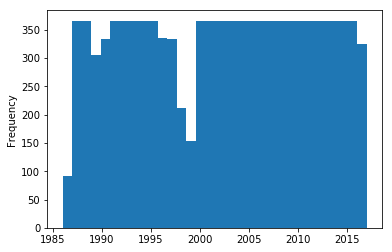

In [4]:
# convert all dates to date time 
indx_weather.DATE=pd.to_datetime(indx_weather.DATE).values
# confirm that all dates are unique 
if len(nm.unique(indx_weather.DATE)) == len(indx_weather.DATE):
    print('All rows have a unique date ('+str(len(nm.unique(indx_weather.DATE)))+'/'+str(len(indx_weather.DATE))+')')
else:
    print('Rows do NOT have a unique date ('+str(len(nm.unique(indx_weather.DATE)))+'/'+str(len(indx_weather.DATE))+')')
# get the year, month, and date for processing
year=list()
day=list()
month=list()
for dt in indx_weather.DATE:
    day.append(dt.day)
    year.append(dt.year)
    month.append(dt.month)
indx_weather=indx_weather.assign(DAY=day).assign(YEAR=year).assign(MONTH=month)
# count the number of days per year 
%matplotlib inline
indx_weather.YEAR.plot(kind='hist',bins=len(nm.unique(indx_weather.YEAR.values)))
plt.show()

#### Temperature:
	All days have data for minimum and maximum temperature. The ranges for minimum and maximum temperature fit with the expected ranges for Seattle. The maximum temperature has a wider distribution and encompasses higher values than the minimum temperature. 

Missing tempature min values in the dataset: 0.0%
Missing tempature max values in the dataset: 0.0%


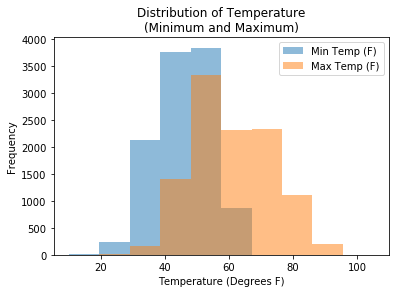

In [32]:
# find the percentage of days missing temperature 
per_na=round(nm.mean(nm.isnan(indx_weather.TMIN)),2)*100
print('Missing tempature min values in the dataset: '+str(per_na)+'%')
per_na=round(nm.mean(nm.isnan(indx_weather.TMAX)),2)*100
print('Missing tempature max values in the dataset: '+str(per_na)+'%')
## explore the distribution of the temperature data
indx_weather.loc[:,('TMIN','TMAX')].plot(kind='hist',alpha=0.5)
plt.xlabel('Temperature (Degrees F)')
plt.title('Distribution of Temperature\n(Minimum and Maximum)')
plt.legend(('Min Temp (F)','Max Temp (F)'))
plt.show()

#### Precipitation: 
	There are no days missing values for the precipitation. The mode amount of precipitation is 0. 

Missing precipitation values in the dataset: 0.0%


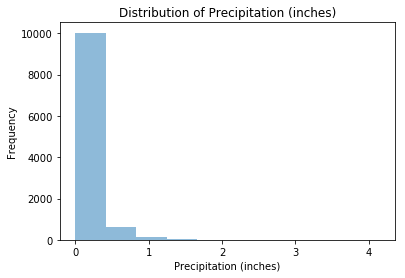

In [33]:
# find the percentage of days missing percepitation 
per_na=round(nm.mean(nm.isnan(indx_weather.PRCP)),2)*100
print('Missing precipitation values in the dataset: '+str(per_na)+'%')
## explore the distribution of the temperature data
indx_weather.loc[:,('PRCP')].plot(kind='hist',alpha=0.5)
plt.xlabel('Precipitation (inches)')
plt.title('Distribution of Precipitation (inches)')
plt.show()

#### Snow:  
	There are some missing values in 1999-2008, this will be considered when analyzing the results. 

Missing snow fall values in the dataset: 27.0%


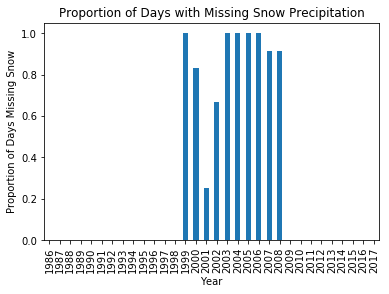

In [36]:
# find the percentage of days missing percepitation 
per_na=round(nm.mean(nm.isnan(indx_weather.SNOW)),2)*100
print('Missing snow fall values in the dataset: '+str(per_na)+'%')
# explore the days missing snow
indx_weather=indx_weather.assign(SNOW_MISSING=nm.isnan(indx_weather.SNOW))
indx_weather.loc[:,('YEAR','SNOW_MISSING')].groupby(['YEAR']).agg(nm.mean).plot(kind='bar',by='YEAR',legend=False)
plt.xlabel('Year')
plt.ylabel('Proportion of Days Missing Snow')
plt.title('Proportion of Days with Missing Snow Precipitation')
plt.show()

#### Additional Stations:
	This research project is predicated on the assumption that the Sand Point Weather station represents weather in Seattle. One of the original research questions tested this assumption using data from the other weather stations in the Seattle area. Unfortunately, the amount of missing data was prohibitive. The table below shows the proportion of non-null values for 2017-10-30 to 2017-11-03. 
    In order to get to the data, navigate to: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND. To reproduce the data used in this study, use the following selections: 
1. Select Weather Observation Type/Dataset: Daily Summaries
2. Select Date Range: 2017-10-30 to 2017-11-03
3. Search For: Stations
4. Enter Search Term: Seattle

In [97]:
# gather data on other stations 
indx_stations=pd.read_csv(working_folder+"1149219.csv")
indx_stations=indx_stations.assign(TMAX_NA=1-nm.isnan(indx_stations.TMAX).astype(int),
                                  TMIN_NA=1-nm.isnan(indx_stations.TMIN).astype(int),
                                  PRCP_NA=1-nm.isnan(indx_stations.PRCP).astype(int),
                                  SNOW_NA=1-nm.isnan(indx_stations.SNOW).astype(int))
indx_stations.loc[:,('NAME','TMAX_NA','TMIN_NA','PRCP_NA','SNOW_NA')].groupby(['NAME']).mean()

,TMAX_NA,TMIN_NA,PRCP_NA,SNOW_NA
NAME,,,,
"SEATTLE 3.0 WNW, WA US",0.0,0.0,1.0,0.750000
"SEATTLE 4.2 N, WA US",0.0,0.0,1.0,0.500000
"SEATTLE 4.2 SW, WA US",0.0,0.0,1.0,0.800000
"SEATTLE 5.1 SE, WA US",0.0,0.0,1.0,0.333333
"SEATTLE 5.5 NNE, WA US",0.0,0.0,1.0,0.500000
"SEATTLE 5.6 N, WA US",0.0,0.0,1.0,0.500000
"SEATTLE 5.8 SSE, WA US",0.0,0.0,1.0,1.000000
"SEATTLE BOEING FIELD, WA US",1.0,1.0,1.0,0.000000
"SEATTLE SAND POINT WEATHER FORECAST OFFICE, WA US",1.0,1.0,1.0,1.000000


## Findings:
### Research Questions:
#### 1. How has Seattle’s temperature changed over time?
	When comparing the minimum and maximum temperature to the average daily minimum and maximum temperatures, then the interquartile range includes 0. Therefore, using this method, there does not appear to be any change in daily minimum and maximum temperature. 

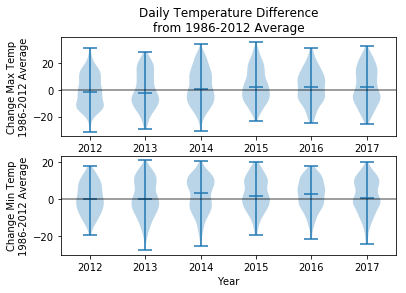

In [98]:
# calculate the average daily minimum and maximum temperature for 1986-2011
indx_weather_old_tmp_avg=indx_weather[indx_weather.YEAR<2012].loc[:,('DAY','TMIN','TMAX')].groupby('DAY').agg(nm.mean)
indx_weather_old_tmp_avg=indx_weather_old_tmp_avg.assign(DAY=indx_weather_old_tmp_avg.index)
indx_weather_old_tmp_avg.columns.values[0]='AVG_TMIN'
indx_weather_old_tmp_avg.columns.values[1]='AVG_TMAX'
# compare with the daily minimum and maximum temperature for 2012-2017
indx_weather_new=indx_weather[indx_weather.YEAR>=2012].loc[:,('DATE','DAY','YEAR','TMIN','TMAX')]
indx_weather_new=pd.merge(indx_weather_new,indx_weather_old_tmp_avg,on='DAY')
indx_weather_new=indx_weather_new.assign(DIFF_TMIN=indx_weather_new.TMIN-indx_weather_new.AVG_TMIN)
indx_weather_new=indx_weather_new.assign(DIFF_TMAX=indx_weather_new.TMAX-indx_weather_new.AVG_TMAX)
# plot the results 
tmax_diff_years=list()
tmin_diff_years=list()
years=nm.unique(indx_weather_new.YEAR)
for y in years:
    tmax_diff_years.append(indx_weather_new.loc[indx_weather_new.YEAR==y,'DIFF_TMAX'].values)
    tmin_diff_years.append(indx_weather_new.loc[indx_weather_new.YEAR==y,'DIFF_TMIN'].values)
figure,axis=plt.subplots(nrows=2)
axis[0].violinplot(tmax_diff_years,years,showmedians=True)
axis[0].axhline(0,alpha=0.5,color='k')
axis[1].violinplot(tmin_diff_years,years,showmedians=True)
axis[1].axhline(0,alpha=0.5,color='k')
axis[0].set_ylabel('Change Max Temp\n1986-2012 Average')
axis[1].set_ylabel('Change Min Temp\n1986-2012 Average')
axis[1].set_xlabel('Year')
axis[0].set_title('Daily Temperature Difference\nfrom 1986-2012 Average')
plt.savefig(working_folder+'average_temperature_comparison.png',bbox_inches='tight')
plt.show()

#### 2. What are the seasonal trends in Seattle's daily temperatures? How have they changed?
	In 2014-2018, there are appears to be a large variation from the average temperature 2001-2005 than in 1986-2000. The rolling monthly average was used a proxy to examine the seasonal components of the time series [13]. 

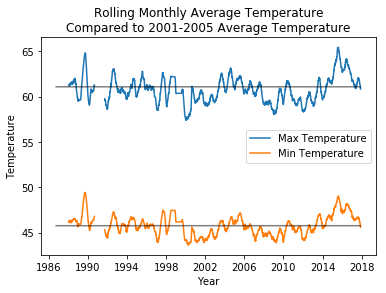

In [99]:
# calculate the average rolling monthly temperature 
avg_tmax=indx_weather.TMAX.rolling(len(nm.unique(indx_weather.MONTH))*len(nm.unique(indx_weather.YEAR))).mean()
avg_tmin=indx_weather.TMIN.rolling(len(nm.unique(indx_weather.MONTH))*len(nm.unique(indx_weather.YEAR))).mean()
tmp_2001=indx_weather.loc[indx_weather.YEAR>2001]
tmp_2001_2005=tmp_2001.loc[indx_weather.YEAR<2005,('TMIN','TMAX')]
# plot the results 
plt.plot(pd.to_datetime(indx_weather.DATE).values,avg_tmax)
plt.plot(pd.to_datetime(indx_weather.DATE).values,avg_tmin)
plt.plot(pd.to_datetime(indx_weather.DATE).values,nm.repeat(nm.mean(tmp_2001_2005.TMAX),indx_weather.shape[0]),
         color='k',alpha=0.5)
plt.plot(pd.to_datetime(indx_weather.DATE).values,nm.repeat(nm.mean(tmp_2001_2005.TMIN),indx_weather.shape[0]),
         color='k',alpha=0.5)
plt.legend(labels=['Max Temperature','Min Temperature'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Rolling Monthly Average Temperature\nCompared to 2001-2005 Average Temperature')
plt.savefig(working_folder+'average_temperature_comparison.png',bbox_inches='tight')
plt.show()

#### 3. How often does Seattle get snow? Have the number of occurrences changed over time?
	 In 2008-2017, every year expect for 2015 had snow fall. In the previous 22 years, there were only 6 days with snowfall. Since there is missing snow data 1999-2008, then this could be caused by a data quality issue. 

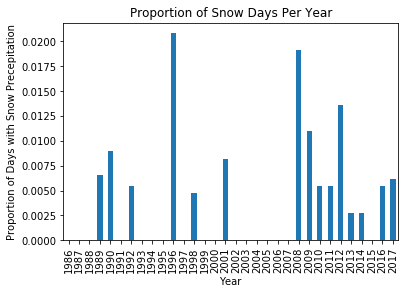

In [100]:
# create a plot of the proportion of days with snow 
indx_weather_snow=indx_weather.assign(SNOW_BOL=indx_weather.SNOW>0)
fig=indx_weather_snow.loc[:,('YEAR','SNOW_BOL')].groupby(['YEAR']).agg(nm.mean).plot(kind='bar',by='YEAR',legend=False)
fig.set(xlabel='Year',ylabel='Proportion of Days with Snow Precepitation',title='Proportion of Snow Days Per Year')
plt.savefig(working_folder+'snow_days_seattle.png',bbox_inches='tight')
plt.show()

#### 4. How much rain does Seattle get? Has the amount changed over time?
	From 1986-2016, there visually appears to be a similar pattern of rain across the months. Visually, there doesn’t appear to be change in the amount of rain over the years, but there is a change seasonally. There appears to be no rain for 5 and 7 consecutive months in 1998 and 1999, respectively.  This could be because of the missing dates in 1999 and 1998. 
	There does appear to be an upward trend in the amount of rain per year. There is still periodicity, but this graph indicates that there could be more rain per year. The missing values need to be considered. There are missing days in 1995-2000 that may be contributing to this visual upward trend. 

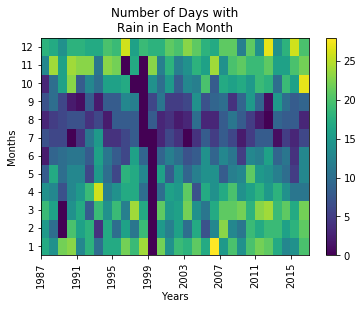

In [101]:
years=nm.unique(indx_weather.YEAR)
years=years[years!=2017]
years=years[years!=1986]
months=nm.unique(indx_weather.MONTH)
counts=nm.zeros((len(months),(len(years))))
r=0
c=0
for y in years:
    for m in months:
        tmp1=indx_weather.loc[indx_weather.YEAR==y]
        tmp2=tmp1.loc[tmp1.MONTH==m]
        counts[r,c]=tmp2.loc[tmp2.PRCP>0].shape[0]
        r=r+1
    c=c+1
    r=0
fig=plt.pcolor(counts)
plt.yticks(months-0.5,[1,2,3,4,5,6,7,8,9,10,11,12,''])
xvals=[0,4,8,12,16,20,24,28]
plt.xticks((nm.linspace(start=0,stop=len(years)-1,num=len(years)))[xvals],years[xvals],rotation='vertical')
plt.xlabel('Years')
plt.ylabel('Months')
plt.title('Number of Days with\nRain in Each Month')
plt.colorbar()
plt.savefig(working_folder+'rain_days_seattle.png',bbox_inches='tight')
plt.show()

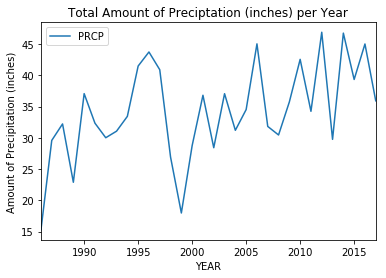

In [125]:
indx_weather.loc[:,('YEAR','PRCP')].groupby(['YEAR']).agg(nm.sum).plot(kind='line',by='YEAR')
plt.ylabel('Amount of Precipitation (inches)')
plt.title('Total Amount of Preciptation (inches) per Year')
plt.show()

## Discussion: 
    In the limited methods used in this study, no conclusive evidence was discovered in terms of the change in Seattle temperature (research questions 1 and 2). The temperature analysis excluded one important metric: temperature anomaly [15]. The change in temperature is not as dramatic as one would expect from the global analysis16. Because of the limitation in the analytic method, this study cannot be used to conclusively state that the temperature is or is not change on a local level.
    The assumed test of missing data in this study was done by looking for nulls in the data. This assumption did not hold true. NOAA reports that the Snow fall coverage is on 70% for this station and timeframe [14]. There is some information available that indicates that snow fall was not measured at SeaTac from 2001-2007 [17]. Therefore, it is possible that missing data caused the finding of increased snow days. 
    As with many research projects, this analysis resulted in more research questions. (1) How does the missing data influence the proceeding analyses? (2) How has Seattle’s temperature changed over time according to the temperature anomaly metric? (3) Is the station at Sand Point Way representative of the Seattle area stations? 
## Conclusions:
	Further study is necessary to understand the weather changes in Seattle. Before conclusive statements can be made the presence of missing data and the differences in data collection should be understood. The assumption that the Sand Point Way station is representative of Seattle should be tested. Since climate change is hotly debated and questioned1, the potential for misinterpretation is high. 
## References:
1.	Paris climate accord: Syria to sign up, isolating US. BBC News (2017).
2.	McGrath, M. Concern at first CO2 rise in four years. BBC News (2017).
3.	Mass, C. Cliff Mass Weather and Climate Blog: How Will Human-Forced Climate Change Affect the Pacific Northwest? Cliff Mass Weather and Climate Blog (2017).
4.	Climate at a Glance | National Centers for Environmental Information (NCEI). Available at: https://www.ncdc.noaa.gov/cag/mapping/global. (Accessed: 9th December 2017)
5.	National Climate Assessment. National Climate Assessment Available at: https://nca2014.globalchange.gov/node/1954. (Accessed: 9th December 2017)
6.	README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) Version 3.22.
7.	GHCN (Global Historical Climatology Network) – Daily Documentation.
8.	Menne, M. J., Durre, I., Vose, R. S., Gleason, B. E. & Houston, T. G. An Overview of the Global Historical Climatology Network-Daily Database. J. Atmospheric Ocean. Technol. 29, 897–910 (2012).
9.	Menne, M. J. et al. Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. (2012).
10.	Sacks, F. M. et al. Dietary Fats and Cardiovascular Disease: A Presidential Advisory From the American Heart Association. Circulation CIR.0000000000000510 (2017). doi:10.1161/CIR.0000000000000510
11.	May, A. Coconut oil isn’t healthy. It’s never been healthy. USA TODAY (2017). Available at: https://www.usatoday.com/story/news/nation-now/2017/06/16/coconut-oil-isnt-healthy-its-never-been-healthy/402719001/. (Accessed: 9th December 2017)
12.	Blunden, J. & Arndt, D. S. State of the Climate in 2016. Bull. Am. Meteorol. Soc. 98, Si-S280 (2017).
13.	Hyndman, R. J. & Athanasopoulos, G. 6.2 Moving averages. Forecasting: principles and practice Available at: https://www.otexts.org/fpp/6/2. (Accessed: 9th December 2017)
14.	Daily Summaries Station Details: SEATTLE SAND POINT WEATHER FORECAST OFFICE, WA US, GHCND:USW00094290 | Climate Data Online (CDO) | National Climatic Data Center (NCDC). Available at: https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094290/detail. (Accessed: 9th December 2017)
15.	Dahlman, L. Climate Change: Global Temperature. NOAA climate.gov (2017).
16.	Change, N. G. C. Global surface temperature | NASA Global Climate Change. Climate Change: Vital Signs of the Planet Available at: https://climate.nasa.gov/vital-signs/global-temperature. (Accessed: 9th December 2017)
17.	Downtown Seattle Snowfall By Year - The West. The Weather Forums Available at: http://theweatherforums.com/index.php/topic/690-downtown-seattle-snowfall-by-year/. (Accessed: 10th December 2017)
### Acknowledgements 
Thank you to Rex (HCDE 512 classmate) for alerting me about the potential snow measurement change. 